<a href="https://colab.research.google.com/github/devarshi167/HOTELDB-EDA-CAPSTONE/blob/main/Copy_of_Copy_of_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking is governed by many factors:-**
# **Including the type of hotel, time of the year,number of guests, types of customers, country, preferences etc.**

# **The basic objective of this project is to Explore and analyze the given data and to discover important factors that govern these bookings.**



In [ ]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#importing dataset 

hoteldb = pd.read_csv('/content/drive/MyDrive/Hoteldf/Hotel Bookings.csv')

# **Overview of the dataset** 

In [ ]:
#top 5 rows

hoteldb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#last 5 rows

hoteldb.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#calculate basic statistical data

hoteldb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Gives a list of columns

list(hoteldb.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
#total rows and columns count

hoteldb.shape

(119390, 32)

In [ ]:
#Prints number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column

hoteldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checks Datatypes

hoteldb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## **FOR CHECKING UNIQUE CONTENTS**

In [ ]:
hoteldb['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hoteldb['is_canceled'].unique()

array([0, 1])

In [ ]:
hoteldb['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
hoteldb['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hoteldb['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hoteldb['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hoteldb['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

# **Now, we'll perform a quick check for missing/Null values**

In [ ]:
#check for missing values

hoteldb.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

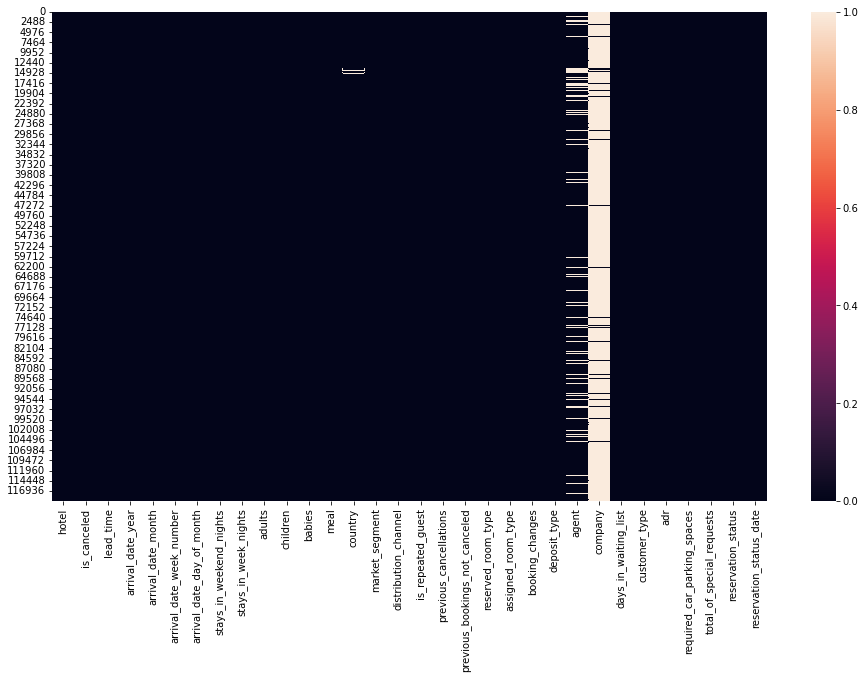

In [ ]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(hoteldb.isnull())

## **Since, we can see agent, company and country are having most null values, we'll check what's in them**

In [ ]:
#checking contents of agent column

agentlist = hoteldb['agent'].tolist()
#list(agentlist) #remove # to view its contents

In [ ]:
#checking contents of company column

companylist = hoteldb['company'].tolist()
#list(companylist) #remove # to view its contents

In [ ]:
#checking contents of country column

countrylist = hoteldb['country'].tolist()
#list(countrylist) #remove # to view its contents

## **From the above data, it is clear that we won't be requiring agent and company data but we need country data and NULL values within it needs to be taken care of. So we'll be doing proper CLEANSING of data**

In [ ]:
#Removing company and agent column

hoteldb= hoteldb.drop(columns=['agent', 'company'])

#Removing missing values

hoteldb = hoteldb.dropna()
print(hoteldb.isna().sum(axis=0))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# converting all the null values to 0 for proper analysis

df = hoteldb.fillna(0)

In [ ]:
# how many null values left(will be depicted by 0)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# in country column, we need to replace zeros with something more adequate

hoteldb.country = hoteldb.country.replace(0, "not mentioned")

# **NOW WE HAVE CLEAN DATA FOR PROPER EDA**

## **Let's get basic idea of statistics through visualization**

# **Univariate Analysis :**
In Univariate Analysis, we choose a 
single feature from the data and try 
to determine what the output or the target value is ,i.e., one 
feature/variable at a time.


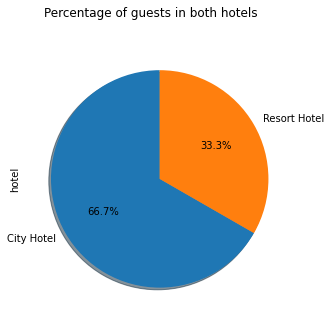

In [ ]:
#Booking ratio of both hotels

dff=hoteldb['hotel'].value_counts()
diagram=dff.plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(10,5), autopct='%1.1f%%', title = 'Percentage of guests in both hotels' )

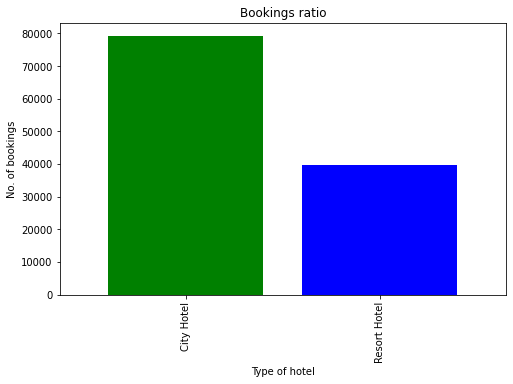

In [ ]:
#bookings statistics of both hotels

df=hoteldb['hotel'].value_counts()
df.plot(kind='bar',width=.8 ,color=['green','blue'],figsize = (8, 5))
plt.xlabel("Type of hotel")
plt.ylabel("No. of bookings")
plt.title("Bookings ratio")
plt.show()

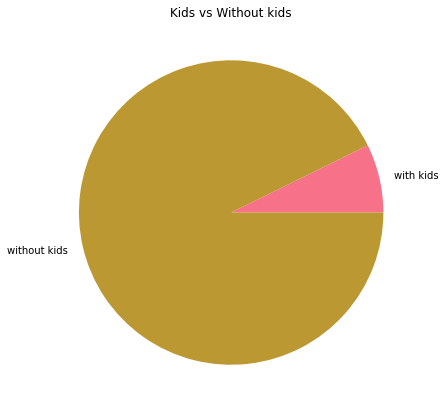

In [ ]:
# number of adults traveling with kids/babies

x = ["with kids", "without kids"]
y = [hoteldb[(hoteldb.children != 0) | (hoteldb.babies != 0)]["adults"].count(), hoteldb[(hoteldb.children == 0) | (hoteldb.babies == 0)]["adults"].count()]

fig = plt.figure(figsize =(10, 7))
colors = sns.color_palette('husl')
plt.pie(y, labels = x, colors = colors)
plt.title("Kids vs Without kids")
plt.show()

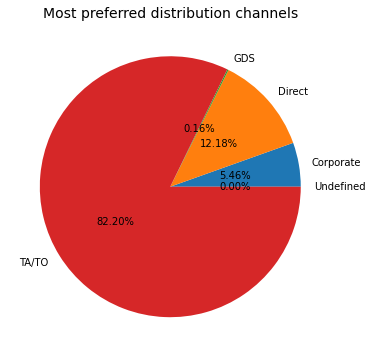

In [ ]:
# most preferred channel for booking hotels

grup_by_dc = hoteldb.groupby(['distribution_channel'])
dc1 = pd.DataFrame(round((grup_by_dc.size()/hoteldb.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize=(12,6))
data = dc1['Booking_%']
labels = dc1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%",  labels=labels, pctdistance=0.5)
plt.title("Most preferred distribution channels", fontsize=14);

Text(0.5, 1.0, 'Resort Hotel')

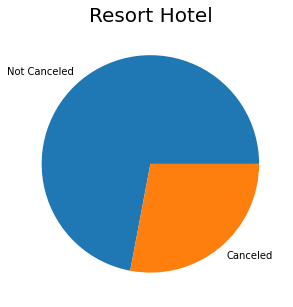

In [ ]:
#cancellations ratio in resort hotels

plt.pie(resort_cancellation,labels=["Not Canceled","Canceled"])
plt.title("Resort Hotel", fontsize=20)


Text(0.5, 1.0, 'City Hotel')

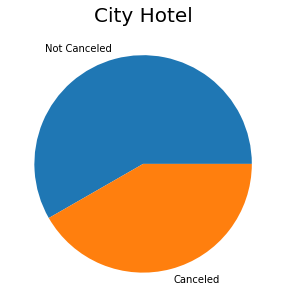

In [ ]:
#Cancellations ratio in city hotels

plt.pie(city_cancellation,labels=["Not Canceled","Canceled"])
plt.title("City Hotel", fontsize=20)


In [ ]:
hoteldb.groupby(['is_repeated_guest'])['is_repeated_guest'].count()

is_repeated_guest
0    115091
1      3806
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

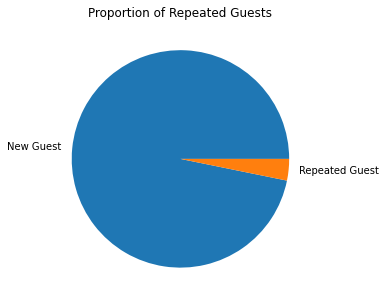

In [ ]:
#repeated guests ratio

plt.pie(hoteldb["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"])
plt.title ("Proportion of Repeated Guests")

## **Bivariate Analysis :** 
In a Bivariate Analysis, we try to analyze 
two features instead of one, and finally 
determine the classification of output we are 
looking for.

In [ ]:
#Finding total unique value counts for every month for busiest month

counts_per_month= hoteldb.arrival_date_month.value_counts()
counts_per_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

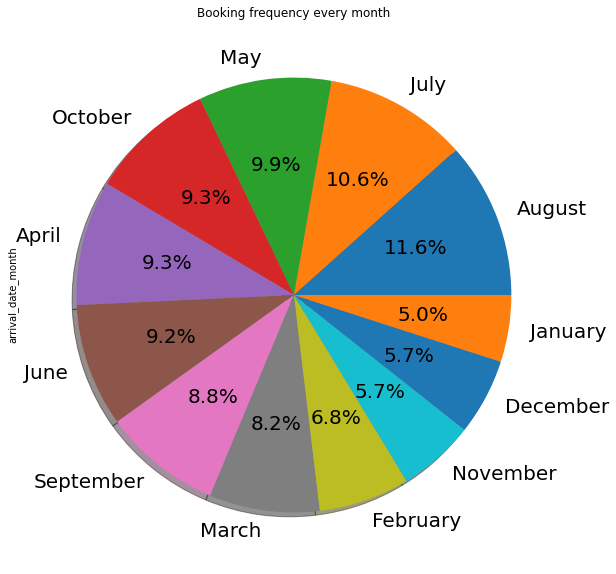

In [ ]:
# plotting it
counts_per_month.plot.pie(figsize=(15,10), title='Booking frequency every month', autopct='%1.1f%%' , fontsize=20 , shadow=True)

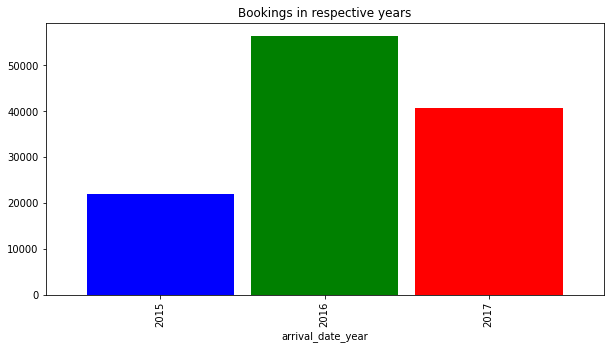

In [ ]:
#Bookings statistics yearwise

total_hotel_booking=hoteldb.groupby('arrival_date_year')['hotel'].count()
total_hotel_booking
diagram=total_hotel_booking.plot(kind='bar', width=0.9 ,color=['b','g','r','c','m','y','k'],figsize=(10,5), title = 'Bookings in respective years')

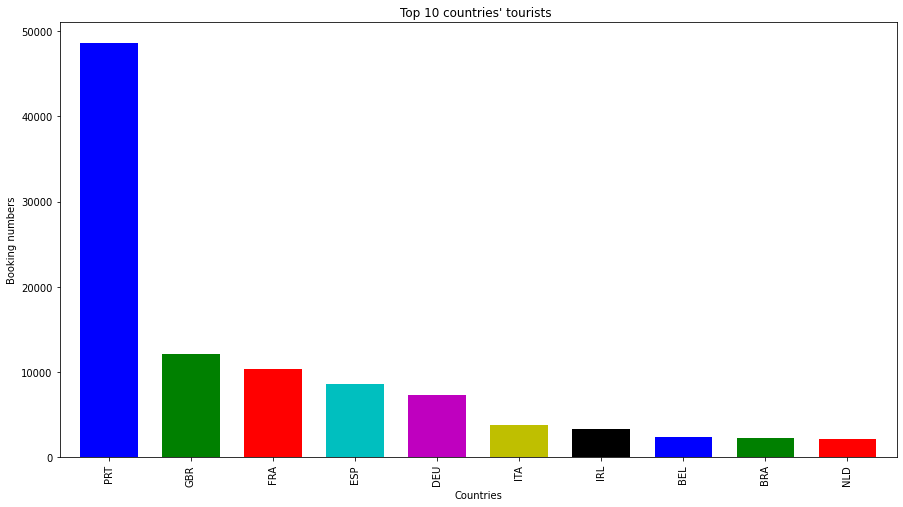

In [ ]:
#Top 10 countries' tourists

df=hoteldb['country'].value_counts().head(10)
df.plot(kind='bar',width=0.7 ,color=['b','g','r','c','m','y','k'],figsize=(15, 8))
plt.xlabel("Countries")
plt.ylabel("Booking numbers")
plt.title("Top 10 countries' tourists ")
plt.show()

In [ ]:
#counts of arrival monthwise

y = pd.DataFrame(hoteldb['arrival_date_month'].value_counts())
x = y.reset_index()
x.columns = ['arrival_date_month','counts']
x

,arrival_date_month,counts
0,August,13852
1,July,12628
2,May,11779
3,October,11095
4,April,11045
5,June,10927
6,September,10467
7,March,9739
8,February,8012
9,November,6752


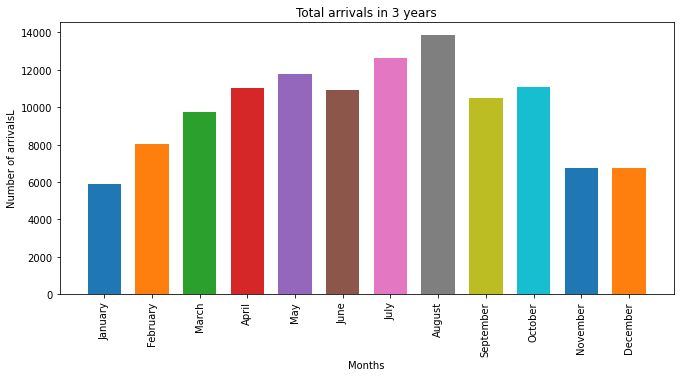

In [ ]:
# most number of guests in combined 3 years (2015 + 2016 + 2017)

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
z = list(hoteldb["arrival_date_month"].unique())
y = []

for i in x:
  y.append(hoteldb[hoteldb.arrival_date_month == i]["arrival_date_month"].count())


plt.figure(figsize=(11,5))
plt.bar(x, y, color = sns.color_palette(),
        width = 0.7)
plt.xlabel("Months")
plt.xticks(rotation= "vertical")
plt.ylabel("Number of arrivalsL")
plt.title("Total arrivals in 3 years")
plt.show()

In [ ]:
#To find number of stays in week mights and weekend nights.

week_and_weekend_stay=hoteldb[['stays_in_weekend_nights','stays_in_week_nights']].sum().reset_index().rename(columns={'index':'time of week',0:'stays'})
week_and_weekend_stay

,time of week,stays
0,stays_in_weekend_nights,110444
1,stays_in_week_nights,297500


Text(0.5, 0, 'Nights of stay')

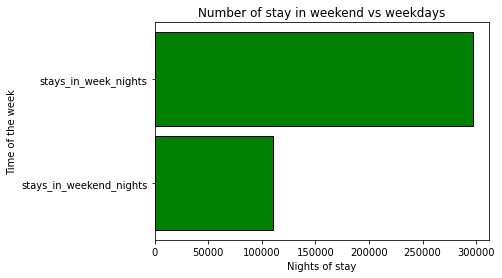

In [ ]:
#Plotting number of week night and weekend nights on a bar chart

plt.barh(week_and_weekend_stay['time of week'],week_and_weekend_stay['stays'],color='green',edgecolor='black',height=0.9)
plt.title('Number of stay in weekend vs weekdays')
plt.ylabel('Time of the week')
plt.xlabel('Nights of stay')

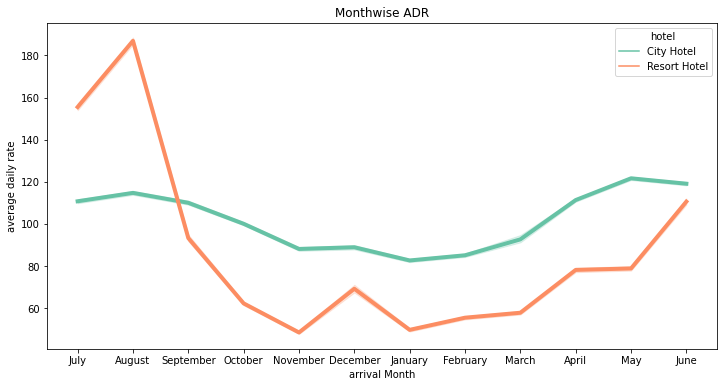

In [ ]:
#average daily rate monthwise = rooms revenue / rooms sold

plt.figure(figsize=(12,6))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=hoteldb,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set2',linewidth = 4)

plt.title("Monthwise ADR")
plt.xlabel("arrival Month")
plt.ylabel("average daily rate")
plt.show()

In [ ]:
#meals

hoteldb["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

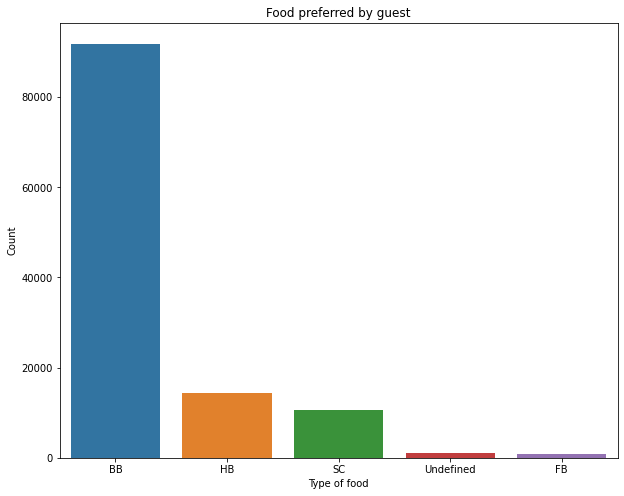

In [ ]:
#meal preference

plt.figure(figsize=(10,8))
sns.barplot(x=hoteldb['meal'].value_counts().keys(),y=hoteldb['meal'].value_counts())
plt.xlabel('Type of food')
plt.ylabel('Count')
plt.title('Food preferred by guest');

In [ ]:
#cancellation count

resort_cancellation=hoteldb[hoteldb["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
city_cancellation=hoteldb[hoteldb['hotel']=='City Hotel']["is_canceled"].value_counts()
total_cancel=hoteldb['is_canceled'].value_counts()

## **How does length of stay affects the adr**

In [ ]:
# Adding total staying days in hotels
hoteldb['total_stay'] = hoteldb['stays_in_weekend_nights']+hoteldb['stays_in_week_nights']

# Adding total people num as column.
hoteldb['total_people'] = hoteldb['adults']+hoteldb['children']+hoteldb['babies']

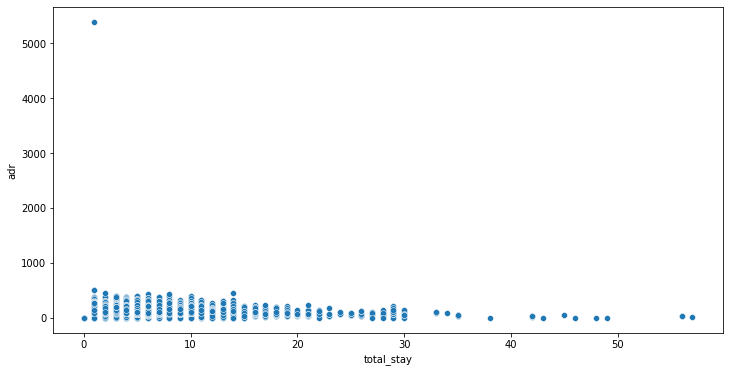

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hoteldb)
plt.show()

In [ ]:
hoteldb.drop(hoteldb[hoteldb['adr'] > 5000].index, inplace = True)   # there is an outlier in adr, so we removed that for better scatter plot

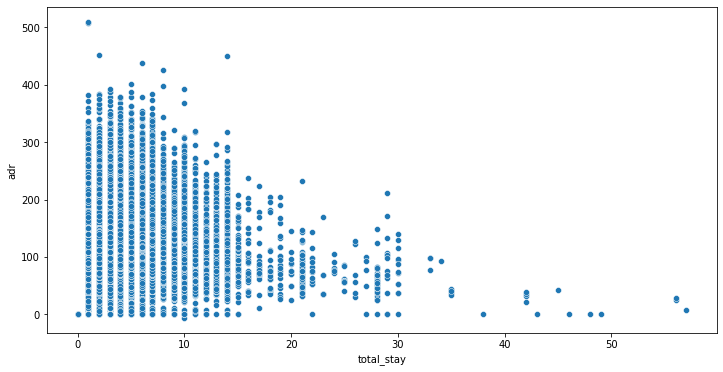

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hoteldb)
plt.show()

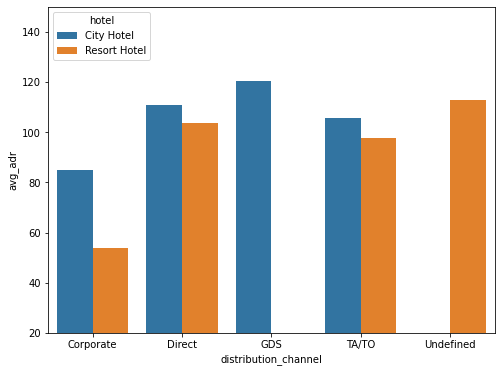

In [ ]:
# distribution channel with better revenue generating deals for hotels

group_by_dc_hotel = hoteldb.groupby(['distribution_channel', 'hotel'])
d4 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (8,6))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_adr'], hue = d4['hotel'])
plt.ylim(20,150)
plt.show()

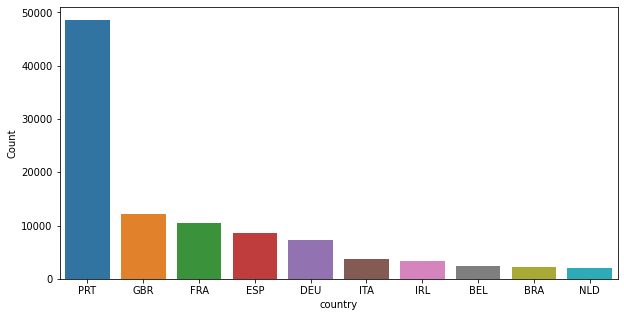

In [ ]:
grouped_by_country = hoteldb.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

In [ ]:
#To find number of special request for bookings made in different months.
special_request_Vs_month=hoteldb.groupby('arrival_date_month')['total_of_special_requests'].sum().reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).reset_index()
special_request_Vs_month

,arrival_date_month,total_of_special_requests
0,January,3223
1,February,4218
2,March,4852
3,April,5774
4,May,6278
5,June,6167
6,July,8467
7,August,10193
8,September,5250
9,October,5491


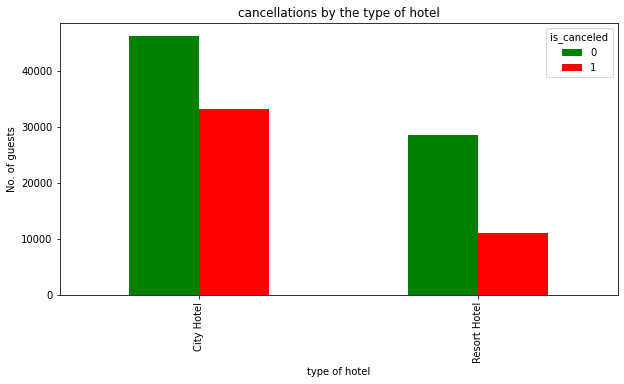

In [ ]:
#hotels with most cancellations


df=hoteldb.groupby(['is_canceled','hotel']).agg(count=('is_canceled','count'))
df=df.reset_index()
df=df.pivot(index='hotel',columns='is_canceled',values='count')
df.plot(kind='bar',width=.5 ,color=['g','r'],figsize = (10, 5))
plt.xlabel("type of hotel")
plt.ylabel("No. of guests")
plt.title("cancellations by the type of hotel")
plt.show()

In [ ]:
#cancellation ratio

bookings=hoteldb.is_canceled.value_counts()
bookings

0    74745
1    44153
Name: is_canceled, dtype: int64

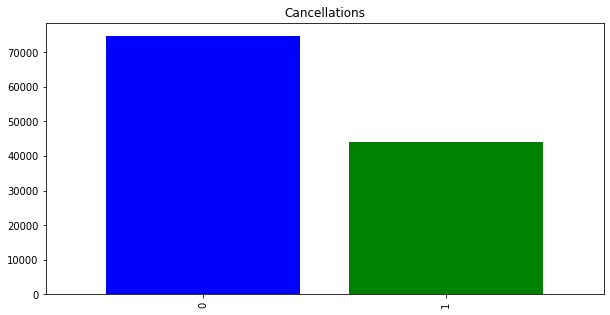

In [ ]:
diagram=bookings.plot(kind='bar',width=0.8 ,color=['b','g','r','c','m','y','k'],figsize=(10, 5) ,title = 'Cancellations')


In [ ]:
#repeated guests

hoteldb.groupby(['is_repeated_guest'])['is_repeated_guest'].count()

is_repeated_guest
0    115092
1      3806
Name: is_repeated_guest, dtype: int64

## **Multivariate Analysis :**
Multivariate analysis deals with such a 
complex set of data with more than two 
features and variables.


##**From the histograms below we can have a brief picture of various column trends**


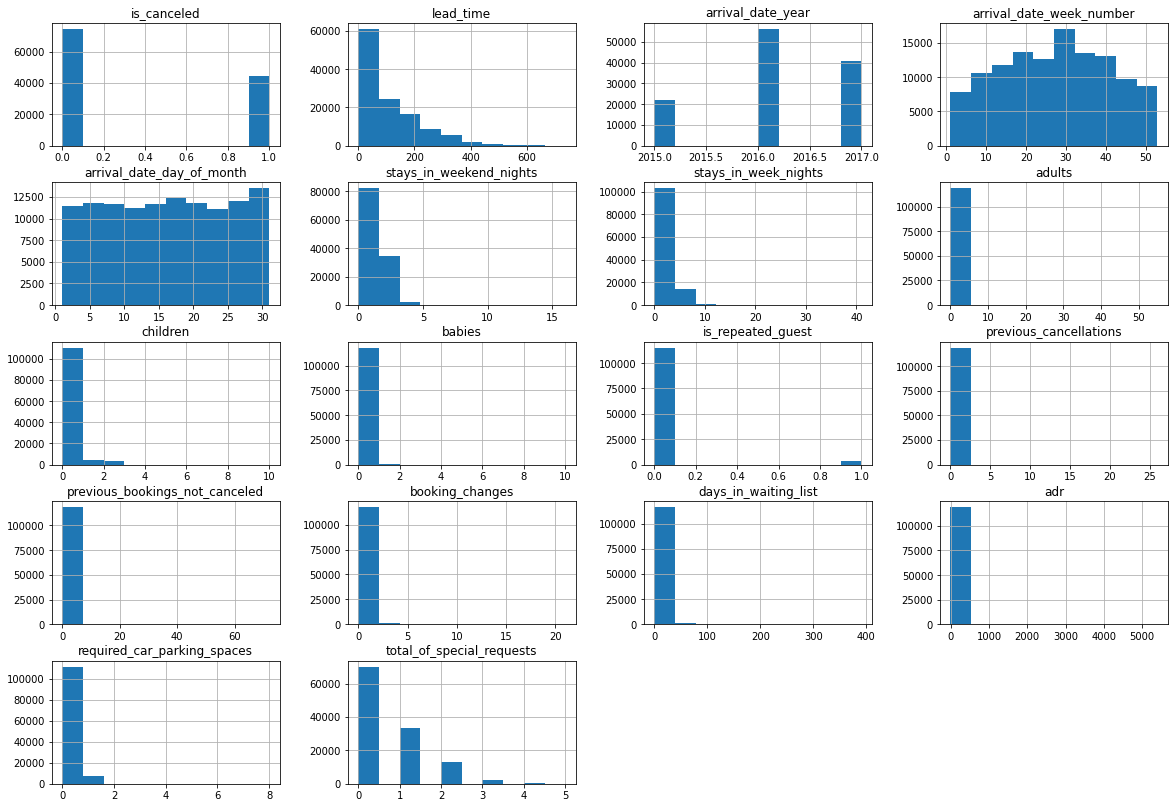

In [ ]:
hoteldb.hist(figsize=(20,14))
plt.show()

##**Requirement of car parking spaces year and month wise**

Text(0.5, 0, 'Months')

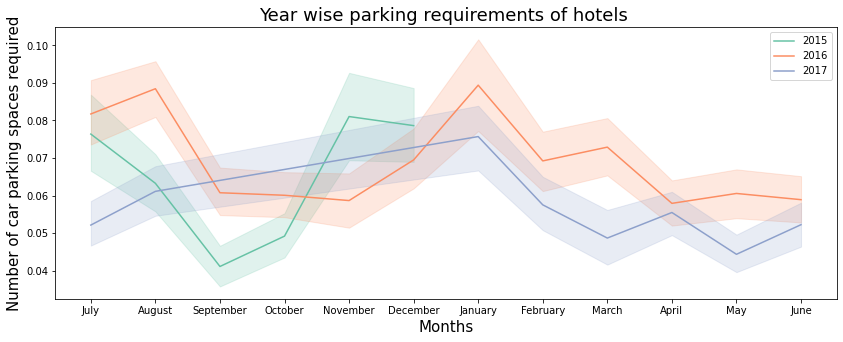

In [ ]:
#Creating a line chart to express the relation between the required number of car parking spaces and year by using seaborn

plt.figure(figsize=(14,5))
sns.lineplot(data=hoteldb,x="arrival_date_month", y="required_car_parking_spaces", hue = 'arrival_date_year', palette= 'Set2')
plt.legend(['2015', '2016', '2017'])
plt.title("Year wise parking requirements of hotels ", fontsize = 18)
plt.ylabel("Number of car parking spaces required",fontsize = 15)
plt.xlabel("Months",fontsize = 15)

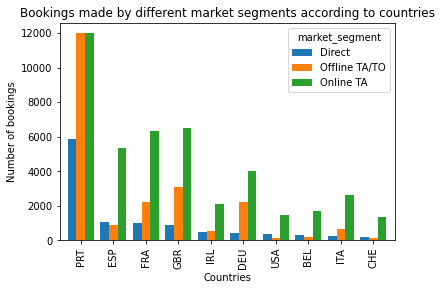

In [ ]:
#Plotting bookings made through three main market segments by different countries' 

market_segment_by_country=hoteldb.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)


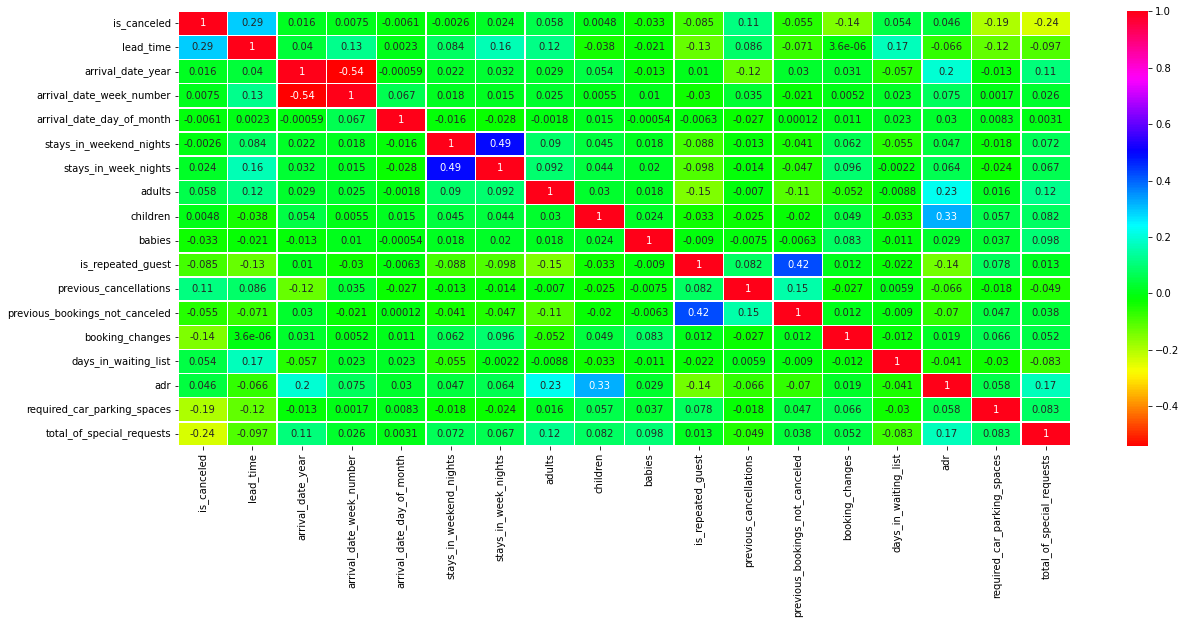

In [ ]:
# correlation graph of the data using heatmap

fig, ax = plt.subplots(figsize=(20,8))
dataplot = sns.heatmap(hoteldb.corr(), cmap="hsv", annot=True, linewidths=.5)
plt.show()

## **Correlation Analysis**

In [ ]:
correlation = hoteldb.corr()
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291994,0.016412,0.007465,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643
lead_time,0.291994,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536
arrival_date_year,0.016412,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,0.010128,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927
arrival_date_week_number,0.007465,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,-0.030411,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778
arrival_date_day_of_month,-0.006127,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082
stays_in_weekend_nights,-0.002631,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669
stays_in_week_nights,0.024110,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785
adults,0.058381,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815
children,0.004751,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786
babies,-0.032521,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601


1) Stays in week night and total stay are positively corelated, even more than weekend nights which says, longer stays are in week time only.

2) lead_time and total_stay is positively corelated. That means more is the stay of customer more will be the lead time.

3) Total people, total stay and ADR has positive correlation which means more the people, longer the stay will give more revenue.

4) is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.

5) adults and lead time a positively corelated which means more the adults more the lead time

6) children and lead time a re negatively co-related means more the children lesser the lead time.

7) ADR and children are very positively corelated, which states more the children more is the revenue.

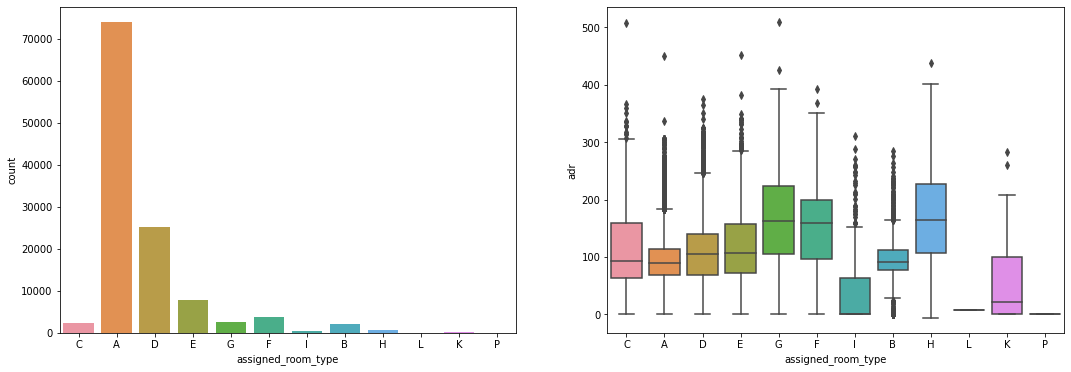

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

grp_by_room = hoteldb.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hoteldb['assigned_room_type'])                      # plotting in demand room
sns.boxplot(ax = axes[1], x = hoteldb['assigned_room_type'], y = hoteldb['adr'])    # pl0tting high adr genrating room
plt.show()

# **INSIGHTS DRAWN**

1. Ratio of bookings - 66.4%- City hotels & 33.6% - Resort hotels
2. Most customers are from Portugal, followed by Great Britain, France and Spain.
3. City hotels are more booked more compared to resort hotels
4. Most bookings were done in 2016
5. Cancellations of resort hotels is comparitively less than city hotels
6. Repeated customers are very less. Quality of service needs to improve
7. In case of resort hotels ADR was highest in august and lowest during november and january
8. In case of city hotels ADR was highest in may and lowest during january
9. On an average, May-June is the busier and most profitable month for the hotels.
10. Ratio of guests with kids is less than the ratio of guests without kids.
11. Since retention is low and most of them are new guests, hotel needs to make specific changes. 
12. Online travel agencies exceeds offline travel agencies and direct booking by far except for Portugal,in which online travel agencies and offline travel agencies are almost equal.
13. We can see that 'A' type room is most in demand but on contrary room type 'H', 'G' and 'F' are most adr genrating rooms respectively
14. Online Market segments gets a lot of customers in comparison to other modes.
15. BB (Bed and Breakfast) is the most preferred meal type by the guest






## **CONCLUSION**

After careful analysis , we can conclude that the hotel industry can benefit a lot by studying the type of customers, their booking mode, the booking month and the seasons. The hotel industry market, their ADR and bookings are based on the type of customers,the month, types of meal, hotel type ,their country of origin, Room types, booking medium and many others.


# **SUGGESTIONS**

1. The hotel industry can take the advantage of seasons and months as ADR was highest in august (rainy season).
2. Most customers booked rooms online so they can be targeted with proper seasonal discounts and vacay-ads.
3. Since ADR was least during Nov and Jan, winter discounts(assumption) or off season discounts might help. 
4. For retention, they should introduce portugese meals(sea foods and meat) and eastern european meals as guests are more from there.
5. They should encourage direct bookings by offering some special discounts as online bookings cancellation is high.
6. Since room A is booked more, they should take into account the factors how it is different from other rooms and implement the same in other rooms as well.
7. Since resort hotels are less preferred, they should look into the factors- might be High cost or guests requirements. 
